In [34]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np



In [36]:
df = pd.read_csv('pvitracker.csv')

In [37]:
df

,State,CD#,2018 Cook PVI Score,2018 Winner,Party,Dem Votes,GOP Votes,Other Votes,Dem %,GOP %,Other %,Dem Margin,2016 Clinton Margin,Swing vs. 2016 Prez,2016 Total Votes Cast,Raw Votes vs. 2016,Final?
0,"New House Breakdown: 235D, 199R, 1 Denied Cert...",NaN,NaN,NaN,D,"60,727,598","50,983,895","1,967,161",53.4%,44.8%,1.7%,8.6%,2.1%,6.5%,"136,179,900",83.5%,NaN
1,"Compiled by: David Wasserman & Ally Flinn, Coo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1,R+15,Bradley Byrne,R,"89,226","153,228",163,36.8%,63.2%,0.1%,-26.4%,-29.2%,2.8%,"305,780",79.3%,x
3,Alabama,2,R+16,Martha Roby,R,"86,931","138,879",420,38.4%,61.4%,0.2%,-23.0%,-31.7%,8.7%,"287,564",78.7%,x
4,Alabama,3,R+16,Mike Rogers,R,"83,996","147,770",149,36.2%,63.7%,0.1%,-27.5%,-33.0%,5.5%,"291,243",79.6%,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Wisconsin,5,R+13,Jim Sensenbrenner,R,"138,385","225,619",1,38.0%,62.0%,0.0%,-24.0%,-19.8%,-4.2%,"405,647",89.7%,x
433,Wisconsin,6,R+8,Glenn Grothman,R,"144,536","180,311",0,44.5%,55.5%,0.0%,-11.0%,-16.6%,5.6%,"371,109",87.5%,x
434,Wisconsin,7,R+8,Sean Duffy,R,"124,307","194,061","4,419",38.5%,60.1%,1.4%,-21.6%,-20.3%,-1.3%,"373,201",86.5%,x
435,Wisconsin,8,R+7,Mike Gallagher,R,"119,265","209,410",0,36.3%,63.7%,0.0%,-27.4%,-17.4%,-10.0%,"372,434",88.3%,x


In [141]:
dfdrop = df.drop(axis=0, index=[0, 1])

In [142]:
dfdrop['abbv'] = dfdrop['State'].apply(lambda x: us_state_abbrev[x])

In [143]:
dfdrop['district'] = dfdrop['abbv'] + '-' + dfdrop['CD#']

In [144]:
dfdropp = dfdrop.copy()

In [145]:
dfdropp['2018 Cook PVI Score'] = dfdropp['2018 Cook PVI Score'].apply(lambda x: ('-' + x[2:]) if x[0] == 'R' else 0 if x == 'EVEN' else x[2:])

In [146]:
dfdropp

,State,CD#,2018 Cook PVI Score,2018 Winner,Party,Dem Votes,GOP Votes,Other Votes,Dem %,GOP %,Other %,Dem Margin,2016 Clinton Margin,Swing vs. 2016 Prez,2016 Total Votes Cast,Raw Votes vs. 2016,Final?,abbv,district
2,Alabama,1,-15,Bradley Byrne,R,"89,226","153,228",163,36.8%,63.2%,0.1%,-26.4%,-29.2%,2.8%,"305,780",79.3%,x,AL,AL-1
3,Alabama,2,-16,Martha Roby,R,"86,931","138,879",420,38.4%,61.4%,0.2%,-23.0%,-31.7%,8.7%,"287,564",78.7%,x,AL,AL-2
4,Alabama,3,-16,Mike Rogers,R,"83,996","147,770",149,36.2%,63.7%,0.1%,-27.5%,-33.0%,5.5%,"291,243",79.6%,x,AL,AL-3
5,Alabama,4,-30,Robert Aderholt,R,"46,492","184,255",222,20.1%,79.8%,0.1%,-59.6%,-62.5%,2.9%,"292,861",78.9%,x,AL,AL-4
6,Alabama,5,-18,Mo Brooks,R,"101,388","159,063",222,38.9%,61.0%,0.1%,-22.1%,-32.9%,10.8%,"314,679",82.8%,x,AL,AL-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Wisconsin,5,-13,Jim Sensenbrenner,R,"138,385","225,619",1,38.0%,62.0%,0.0%,-24.0%,-19.8%,-4.2%,"405,647",89.7%,x,WI,WI-5
433,Wisconsin,6,-8,Glenn Grothman,R,"144,536","180,311",0,44.5%,55.5%,0.0%,-11.0%,-16.6%,5.6%,"371,109",87.5%,x,WI,WI-6
434,Wisconsin,7,-8,Sean Duffy,R,"124,307","194,061","4,419",38.5%,60.1%,1.4%,-21.6%,-20.3%,-1.3%,"373,201",86.5%,x,WI,WI-7
435,Wisconsin,8,-7,Mike Gallagher,R,"119,265","209,410",0,36.3%,63.7%,0.0%,-27.4%,-17.4%,-10.0%,"372,434",88.3%,x,WI,WI-8


In [149]:
dfdropp.rename(columns={'2018 Cook PVI Score': 'pvi'}, inplace=True)


In [150]:
dfend = dfdropp[['pvi', 'Dem Margin', '2016 Clinton Margin', 'district']]

#dfdropp['pvi', 'Dem Margin', '2016 Clinton Margin', ]

In [151]:
dfend

,pvi,Dem Margin,2016 Clinton Margin,district
2,-15,-26.4%,-29.2%,AL-1
3,-16,-23.0%,-31.7%,AL-2
4,-16,-27.5%,-33.0%,AL-3
5,-30,-59.6%,-62.5%,AL-4
6,-18,-22.1%,-32.9%,AL-5
...,...,...,...,...
432,-13,-24.0%,-19.8%,WI-5
433,-8,-11.0%,-16.6%,WI-6
434,-8,-21.6%,-20.3%,WI-7
435,-7,-27.4%,-17.4%,WI-8


In [152]:
dfend['Dem Margin'] = dfend['Dem Margin'].apply(lambda x: x[:-1])
dfend['2016 Clinton Margin'] = dfend['2016 Clinton Margin'].apply(lambda x: x[:-1])
#dfend[['pvi','Dem Margin','2016 Clinton Margin']] = dfend[['pvi','Dem Margin','2016 Clinton Margin']].apply(pd.to_numeric)

In [153]:
dfend[['pvi','Dem Margin','2016 Clinton Margin']] = dfend[['pvi','Dem Margin','2016 Clinton Margin']].apply(pd.to_numeric)

&lt;seaborn.axisgrid.PairGrid at 0x7f88c1d82fd0&gt;

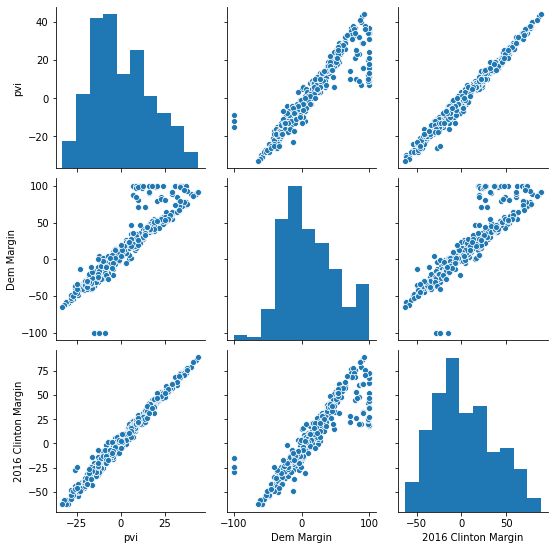

In [154]:
sns.pairplot(dfend)

In [155]:
dfend.to_pickle('margins2018')

In [156]:
tab = pd.read_csv('116cong.csv')

In [158]:
tab

District                                        object
Code                                            object
Party                                           object
Incumbent Name                                  object
Unnamed: 4                                      object
                                                 ...  
2018 5-Year ACS White Educational Attainment    object
Unnamed: 116                                    object
Unnamed: 117                                    object
Unnamed: 118                                    object
Unnamed: 119                                    object
Length: 120, dtype: object